In [1]:
import networkx as nx
import numpy as np
import scipy as sp
from numpy import linalg as LA
import pandas as pd
import csv
import matplotlib.pylab as plt
import os
import random

if 'google.colab' in str(get_ipython()):
    print('Working in colab')
    
    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("working locally")

Working in colab
Mounted at /content/drive


In [ ]:
!ls ./drive/MyDrive/fb100



 American75.graphml	    Mich67.graphml	     UC61.graphml
 Amherst41.graphml	    Michigan23.graphml	     UC64.graphml
 Auburn71.graphml	    Middlebury45.graphml     UCF52.graphml
 Baylor93.graphml	    Mississippi66.graphml    UChicago30.graphml
 BC17.graphml		    MIT8.graphml	     UCLA26.graphml
 Berkeley13.graphml	    MSU24.graphml	     UConn91.graphml
 Bingham82.graphml	    MU78.graphml	     UCSB37.graphml
 Bowdoin47.graphml	    Northeastern19.graphml   UCSC68.graphml
 Brandeis99.graphml	    Northwestern25.graphml   UCSD34.graphml
 Brown11.graphml	   'Notre Dame57.graphml'    UF21.graphml
 BU10.graphml		    NYU9.graphml	     UGA50.graphml
 Bucknell39.graphml	    Oberlin44.graphml	     UIllinois20.graphml
 Cal65.graphml		    Oklahoma97.graphml	     UMass92.graphml
 Caltech36.graphml	    Penn94.graphml	     UNC28.graphml
 Carnegie49.graphml	    Pepperdine86.graphml     UPenn7.graphml
 Colgate88.graphml	    Princeton12.graphml      USC35.graphml
 Columbia2.graphml	    Reed98.graphml	    

# Social Network Analysis with the Facebook100 Dataset

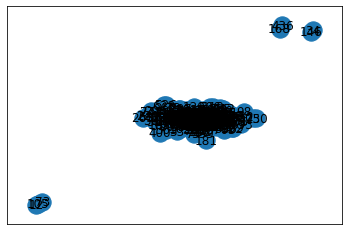

In [ ]:
G_Caltech=nx.readwrite.graphml.read_graphml('./drive/MyDrive/fb100/Caltech36.graphml')

plt.figure()
nx.draw_networkx(G_Caltech)

Text(0.5, 1.0, 'Degree distribution Caltech')

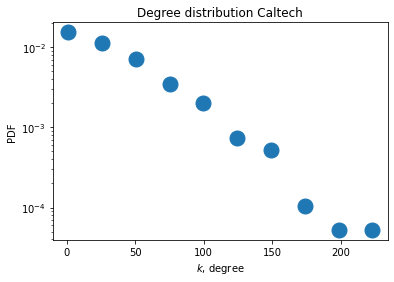

In [ ]:
degree_sequence = sorted([d for n, d in G_Caltech.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)

plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")

plt.title("Degree distribution Caltech")


In [ ]:
#Compute the mean local coefficient.
nx.algorithms.cluster.average_clustering(G_Caltech)

0.40929439048517247

In [ ]:
#Compute the global clustering coefficient.
nx.algorithms.cluster.transitivity(G_Caltech)

0.2912826901150874

In [ ]:
#Returns the density of graph G
nx.classes.function.density(G_Caltech)

0.05640442132639792

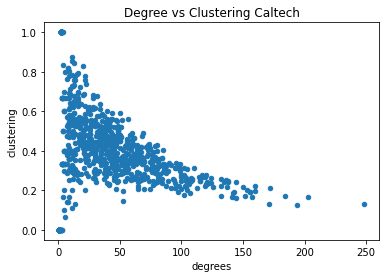

In [ ]:
d1= nx.algorithms.cluster.clustering(G_Caltech)
d1 = pd.DataFrame.from_dict(d1, orient='index')
d1.columns= ["clustering"]
d2= dict(nx.degree(G_Caltech))
d2 = pd.DataFrame.from_dict(d2, orient='index')
d2.columns = ["degrees"]
df = d1.join(d2)

df.plot.scatter(x="degrees", y="clustering", marker="o", title ="Degree vs Clustering Caltech")

#forte connectivité et faible clustering = hub entre plusieurs clusters 

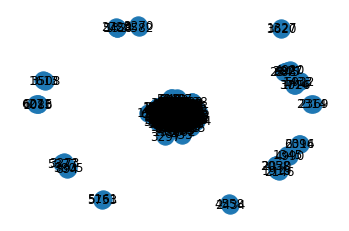

In [ ]:
G_MIT=nx.readwrite.graphml.read_graphml('./drive/MyDrive/fb100/MIT8.graphml')

plt.figure()
nx.draw_networkx(G_MIT)
plt.axis('off');

Text(0.5, 1.0, 'Degree distribution MIT')

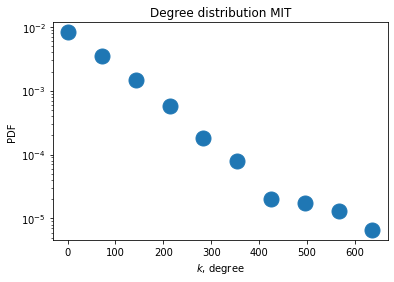

In [ ]:
degree_sequence = sorted([d for n, d in G_MIT.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)

plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")

plt.title("Degree distribution MIT")

In [ ]:
#Compute the mean local clustering coefficient.
nx.algorithms.cluster.average_clustering(G_MIT)

0.2712187419501315

In [ ]:
#Compute the global clustering coefficient for the graph G.
nx.algorithms.cluster.transitivity(G_MIT)

0.18028845093502427

In [ ]:
#Returns the density of graph G
nx.classes.function.density(G_MIT)

0.012118119495041378

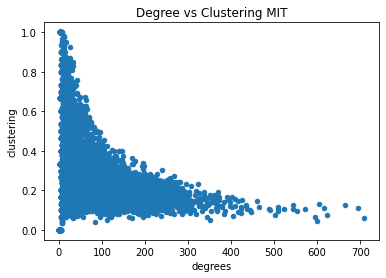

In [ ]:
d1= nx.algorithms.cluster.clustering(G_MIT)
d1 = pd.DataFrame.from_dict(d1, orient='index')
d1.columns= ["clustering"]
d2= dict(nx.degree(G_MIT))
d2 = pd.DataFrame.from_dict(d2, orient='index')
d2.columns = ["degrees"]
df = d1.join(d2)

df.plot.scatter(x="degrees", y="clustering", marker="o", title ="Degree vs Clustering MIT")

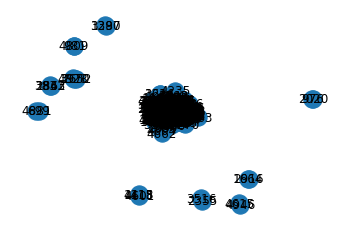

In [ ]:
G_Hopkins=nx.readwrite.graphml.read_graphml('./drive/MyDrive/fb100/Johns Hopkins55.graphml')

plt.figure()
nx.draw_networkx(G_Hopkins)
plt.axis('off');

Text(0.5, 1.0, 'Degree distribution Hopkins')

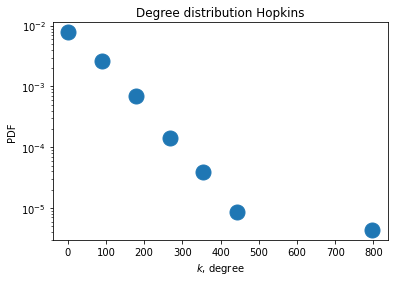

In [ ]:
degree_sequence = sorted([d for n, d in G_Hopkins.degree()], reverse=True)  # degree sequence
hist, bin_edges = np.histogram(degree_sequence, density=True)

plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
plt.xlabel(r"$k$, degree ")
plt.ylabel(r"PDF")

plt.title("Degree distribution Hopkins")


In [ ]:
#Compute the local mean clustering coefficient.
nx.algorithms.cluster.average_clustering(G_Hopkins)

0.26839307371293525

In [ ]:
#Compute the global clustering coefficient for the graph G.
nx.algorithms.cluster.transitivity(G_Hopkins)

0.19316123901594015

In [ ]:
#Returns the density of graph G
nx.classes.function.density(G_Hopkins)

0.013910200162372396

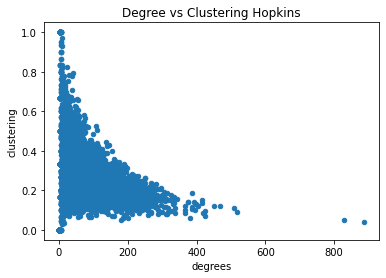

In [ ]:
d1= nx.algorithms.cluster.clustering(G_Hopkins)
d1 = pd.DataFrame.from_dict(d1, orient='index')
d1.columns= ["clustering"]
d2= dict(nx.degree(G_Hopkins))
d2 = pd.DataFrame.from_dict(d2, orient='index')
d2.columns = ["degrees"]
df = d1.join(d2)

df.plot.scatter(x="degrees", y="clustering", marker="o", title ="Degree vs Clustering Hopkins")


In [ ]:
list = os.listdir('./drive/MyDrive/fb100')
X = []
Ydorm = []
Ystatus = []
Ymajor = []
Ygender =[]


for cur in list :

  G=nx.readwrite.graphml.read_graphml('./drive/MyDrive/fb100/'+cur)
  X.append(G.number_of_nodes())
  Ydorm.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(G,"dorm"))
  Ystatus.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(G,"student_fac"))
  Ymajor.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(G,"major_index"))
  Ygender.append(nx.algorithms.assortativity.attribute_assortativity_coefficient(G,"gender"))



Text(0.5, 1.0, 'Assortativity of each university for attribute Gender')

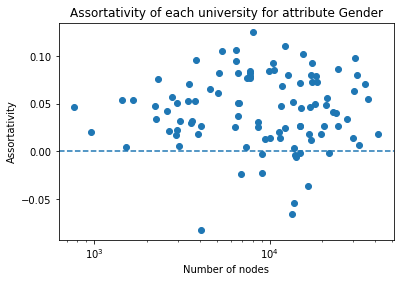

In [ ]:
#vérification algorithme pour voir si j'obtiens le même graphe que dans l'énoncé
plt.figure()
plt.plot(X, Ygender, "o")
plt.axhline(y=0.0, linestyle ='--')
plt.xscale("log")
plt.xlabel(r"Number of nodes")
plt.ylabel(r"Assortativity")

plt.title("Assortativity of each university for attribute Gender")

Text(0.5, 1.0, 'Histogram for attribute Gender')

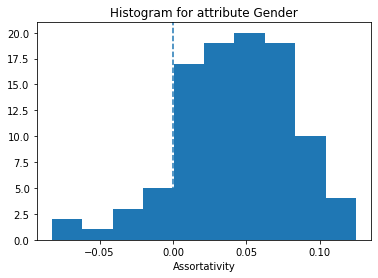

In [ ]:
plt.figure()
plt.hist(Ygender)
plt.axvline(x=0.0, linestyle ='--')

plt.xlabel(r"Assortativity")
plt.title("Histogram for attribute Gender")

Text(0.5, 1.0, 'Assortativity of each university for attribute Dorm')

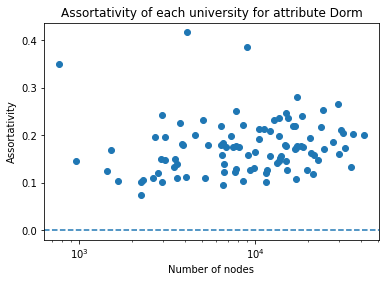

In [ ]:
#Assortativity of each university for attribute Dorm
plt.figure()
plt.plot(X, Ydorm, "o")
plt.axhline(y=0.0, linestyle ='--')
plt.xscale("log")
plt.xlabel(r"Number of nodes")
plt.ylabel(r"Assortativity")

plt.title("Assortativity of each university for attribute Dorm")

Text(0.5, 1.0, 'Histogram for attribute Dorm')

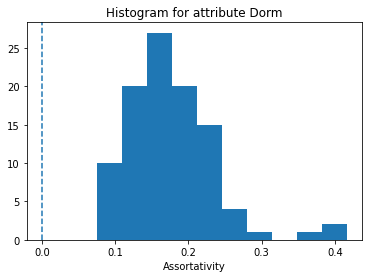

In [ ]:
plt.figure()
plt.hist(Ydorm)
plt.axvline(x=0.0, linestyle ='--')

plt.xlabel(r"Assortativity")
plt.title("Histogram for attribute Dorm")

Text(0.5, 1.0, 'Assortativity of each university for attribute Student/faculty status')

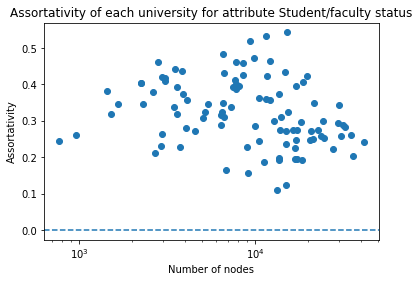

In [ ]:
#Assortativity of each university for attribute Student/faculty status
plt.figure()
plt.plot(X, Ystatus, "o")
plt.axhline(y=0.0, linestyle ='--')
plt.xscale("log")
plt.xlabel(r"Number of nodes")
plt.ylabel(r"Assortativity")

plt.title("Assortativity of each university for attribute Student/faculty status")

Text(0.5, 1.0, 'Histogram for attribute Dorm')

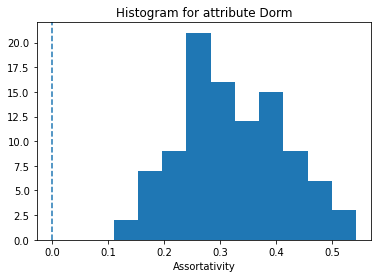

In [ ]:
plt.figure()
plt.hist(Ystatus)
plt.axvline(x=0.0, linestyle ='--')

plt.xlabel(r"Assortativity")
plt.title("Histogram for attribute Status")

Text(0.5, 1.0, 'Assortativity of each university for attribute Major')

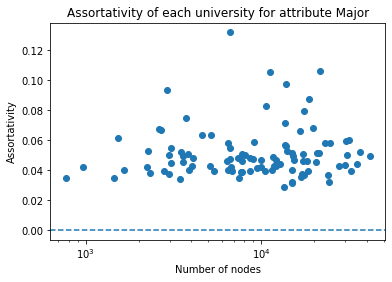

In [ ]:
#Assortativity of each university for attribute Major
plt.figure()
plt.plot(X, Ymajor, "o")
plt.axhline(y=0.0, linestyle ='--')
plt.xscale("log")
plt.xlabel(r"Number of nodes")
plt.ylabel(r"Assortativity")

plt.title("Assortativity of each university for attribute Major")

Text(0.5, 1.0, 'Histogram for attribute Dorm')

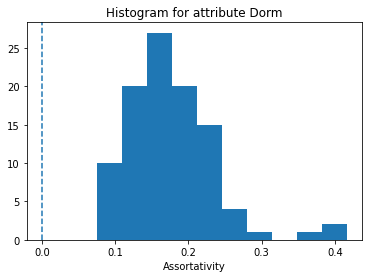

In [ ]:
plt.figure()
plt.hist(Ymajor)
plt.axvline(x=0.0, linestyle ='--')

plt.xlabel(r"Assortativity")
plt.title("Histogram for attribute Major")

# Link prediction



In [ ]:
from abc import ABC
from abc import abstractmethod
import networkx as nx
import numpy as np
import progressbar

class LinkPrediction ( ABC ) :
  def __init__ ( self , graph ) :
    """
    Constructor

    Parameters
    ----------
    graph : Networkx graph
    """
    self . graph = graph
    self . N = len ( graph )

  def neighbors ( self , v ) :
    """
    Return the neighbors list of a node

    Parameters
    ----------
      v : int
    node id

    Return
    ------
      neighbors_list : python list
    """
    neighbors_list = self . graph . neighbors ( v )
    return list ( neighbors_list )

  @abstractmethod
  def fit ( self ) :
    raise NotImplementedError ( " Fit must be implemented " )

class CommonNeighbors ( LinkPrediction ) :
  def __init__ ( self , graph ) :
    super ( CommonNeighbors , self ) . __init__ ( graph )

  def common_neighbors (self, u, v):
    return nx.common_neighbors(self.graph, u, v)

class Jaccard (LinkPrediction):
   def __init__ ( self , graph ) :
    super ( Jaccard , self ) . __init__ ( graph )

   def jaccard (self):
    return nx.jaccard_coefficient(self.graph)

class AdamicAdar (LinkPrediction):
   def __init__ ( self , graph ) :
    super ( AdamicAdar , self ) . __init__ ( graph )
   
   def adamic_adar(self):
    return nx.adamic_adar_index(self.graph)

In [ ]:


b = nx.jaccard_coefficient(G_Caltech)
for u, v, p in b:
    print(f"({u}, {v}) -> {p:.8f}")


c = nx.adamic_adar_index(G_Caltech)

for u, v, p in c:

    print(f"({u}, {v}) -> {p:.8f}")



#Find missing labels with the label propagation algorithms

In [ ]:
#Returns communities in G as detected by asynchronous label propagation.
communities_dict = nx.algorithms.community.label_propagation.asyn_lpa_communities(G_Caltech)

In [ ]:
#remove random nodes 
sample1 = int(G_Caltech.number_of_nodes()*0.1)
sample2 = int(G_Caltech.number_of_nodes()*0.2)
sample3 = int(G_Caltech.number_of_nodes()*0.3)
RandomSample1 = random.sample(G_Caltech.nodes(), sample1)
RandomSample2 = random.sample(G_Caltech.nodes(), sample2)
RandomSample3 = random.sample(G_Caltech.nodes(), sample3)


G_Caltech_copie = G_Caltech.remove_nodes_from(RandomSample1)

label_prop = nx.algorithms.community.label_propagation.asyn_lpa_communities(G_Caltech_copie)
plt.figure()
nx.draw_networkx(G_Caltech_copie)

TypeError: ignored

<Figure size 432x288 with 0 Axes>